In [1]:
!pip install opencv-python-headless

In [ ]:
# Download links for SAM model checkpoints from Meta AI's official GitHub repository:
# vit_b (01ec64.pth): https://github.com/facebookresearch/segment-anything#model-checkpoints
# Direct download:
# 01ec64.pth (vit_b): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
# 8939.pth (vit_h): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

print("SAM model checkpoint download links:")
print("vit_b (01ec64.pth): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth")
print("vit_h (8939.pth): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth")
print("Official GitHub: https://github.com/facebookresearch/segment-anything#model-checkpoints")

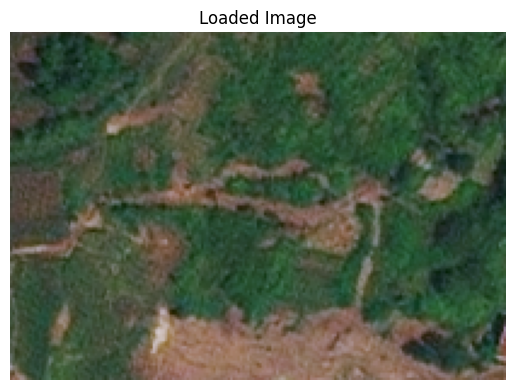

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

img_path = r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\landslide\image\df024.png"
if not os.path.exists(img_path):
    print(f"Error: File does not exist at {img_path}")
else:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image at {img_path}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title("Loaded Image")
        plt.axis('off')
        plt.show()

c:\Users\shrir\.conda\envs\tf_env\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


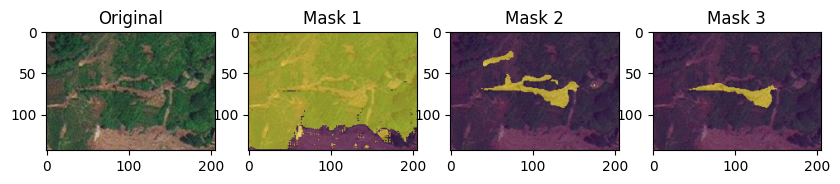

In [ ]:
if image is not None:
    # Load SAM model (make sure to download the weights and set the correct path)
    from segment_anything import sam_model_registry, SamPredictor
    import numpy as np

    sam = sam_model_registry["vit_b"](checkpoint=r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)
    predictor.set_image(image_rgb)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image.shape[1]//2, image.shape[0]//2]])
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Visualize
    plt.figure(figsize=(10,5))
    plt.subplot(1, len(masks)+1, 1)
    plt.imshow(image_rgb)
    plt.title("Original")
    for i, mask in enumerate(masks):
        plt.subplot(1, len(masks)+1, i+2)
        plt.imshow(image_rgb)
        plt.imshow(mask, alpha=0.5)
        plt.title(f"Mask {i+1}")
    plt.show()

c:\Users\shrir\.conda\envs\tf_env\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Combined segmentation visualization saved to combined_segmentation_output2.png


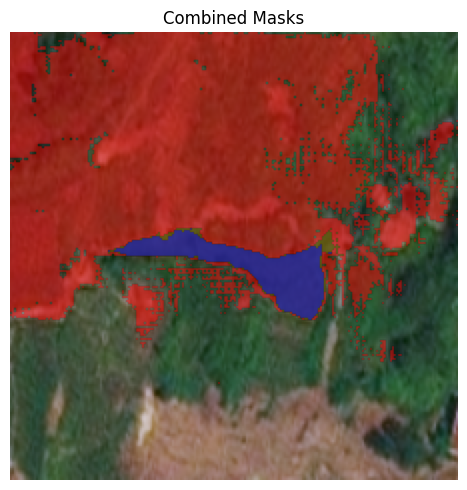

In [8]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2

# Define the image path and load the image
# Assuming 'image' is loaded elsewhere, e.g., from a file
image = cv2.imread(r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\landslide\image\df024.png") 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image_rgb is not None:
    # Resize the original image for a 224x224 resolution
    image_pil = Image.fromarray(image_rgb)
    resize_transform = transforms.Resize((224, 224))
    image_resized = np.array(resize_transform(image_pil))

    # Load SAM model
    sam = sam_model_registry["vit_b"](checkpoint=r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)

    # Set the resized image for the predictor
    predictor.set_image(image_resized)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image_resized.shape[1]//2, image_resized.shape[0]//2]])
    input_label = np.array([1])

    # Get the individual masks
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Create a colormap for different masks
    colors = ['red', 'green', 'blue']  # You can add more colors if needed
    
    # Create visualization for combined masks only
    plt.figure(figsize=(5, 5))
    plt.imshow(image_resized)
    
    # Overlay each mask with its respective color
    for i, mask in enumerate(masks):
        colored_mask = np.zeros((*mask.shape, 4))  # RGBA
        colored_mask[mask] = plt.cm.colors.to_rgba(colors[i])[:-1] + (0.5,)  # Set alpha to 0.5
        plt.imshow(colored_mask)
    
    plt.title("Combined Masks")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("combined_segmentation_output2.png", bbox_inches='tight', dpi=300)
    print("Combined segmentation visualization saved to combined_segmentation_output2.png")

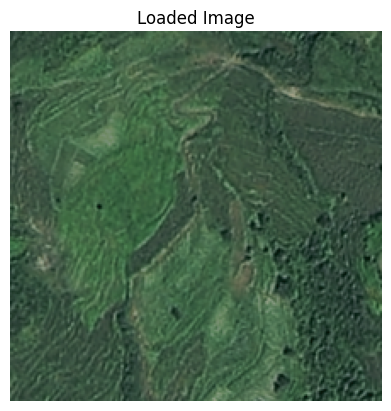

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

img_path = r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\non-landslide\image\ddfgf10164.png"
if not os.path.exists(img_path):
    print(f"Error: File does not exist at {img_path}")
else:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image at {img_path}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title("Loaded Image")
        plt.axis('off')
        plt.show()

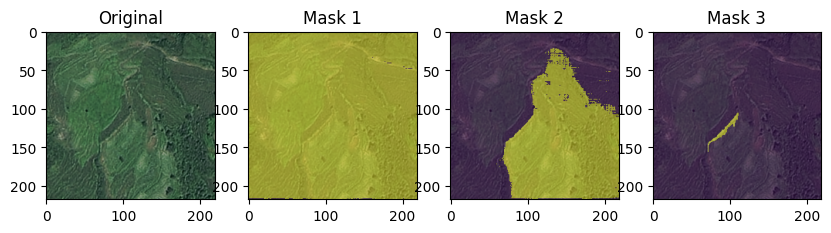

In [11]:
if image is not None:
    # Load SAM model (make sure to download the weights and set the correct path)
    from segment_anything import sam_model_registry, SamPredictor
    import numpy as np

    sam = sam_model_registry["vit_b"](checkpoint=r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)
    predictor.set_image(image_rgb)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image.shape[1]//2, image.shape[0]//2]])
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Visualize
    plt.figure(figsize=(10,5))
    plt.subplot(1, len(masks)+1, 1)
    plt.imshow(image_rgb)
    plt.title("Original")
    for i, mask in enumerate(masks):
        plt.subplot(1, len(masks)+1, i+2)
        plt.imshow(image_rgb)
        plt.imshow(mask, alpha=0.5)
        plt.title(f"Mask {i+1}")
    plt.show()

c:\Users\shrir\.conda\envs\tf_env\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Combined segmentation visualization saved to combined_segmentation_output2.png


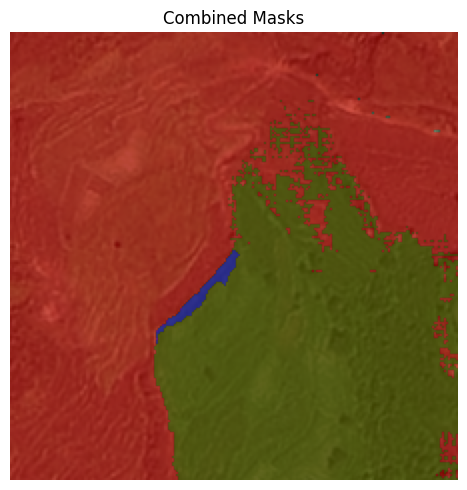

In [9]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2

# Define the image path and load the image
# Assuming 'image' is loaded elsewhere, e.g., from a file
image = cv2.imread(r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\non-landslide\image\ddfgf10164.png") 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image_rgb is not None:
    # Resize the original image for a 224x224 resolution
    image_pil = Image.fromarray(image_rgb)
    resize_transform = transforms.Resize((224, 224))
    image_resized = np.array(resize_transform(image_pil))

    # Load SAM model
    sam = sam_model_registry["vit_b"](checkpoint=r"D:\download\Bijie_landslide_dataset\Bijie-landslide-dataset\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)

    # Set the resized image for the predictor
    predictor.set_image(image_resized)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image_resized.shape[1]//2, image_resized.shape[0]//2]])
    input_label = np.array([1])

    # Get the individual masks
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Create a colormap for different masks
    colors = ['red', 'green', 'blue']  # You can add more colors if needed
    
    # Create visualization for combined masks only
    plt.figure(figsize=(5, 5))
    plt.imshow(image_resized)
    
    # Overlay each mask with its respective color
    for i, mask in enumerate(masks):
        colored_mask = np.zeros((*mask.shape, 4))  # RGBA
        colored_mask[mask] = plt.cm.colors.to_rgba(colors[i])[:-1] + (0.5,)  # Set alpha to 0.5
        plt.imshow(colored_mask)
    
    plt.title("Combined Masks")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("combined_segmentation_output3.png", bbox_inches='tight', dpi=300)
    print("Combined segmentation visualization saved to combined_segmentation_output2.png")